We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [28]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\paul\Documents\Formation Data Analyst\Bootcamp\Module 2\Lab_21_Time_Series_Models\airlines_passengers.csv')

Let’s display the first five rows of data

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [4]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [5]:
data['Month']=pd.to_datetime(data['Month'])
data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


The next thing we can do is convert the month column to an index. 


In [8]:
data.index = data['Month']
data=data.drop(columns='Month', axis=0, inplace=False)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

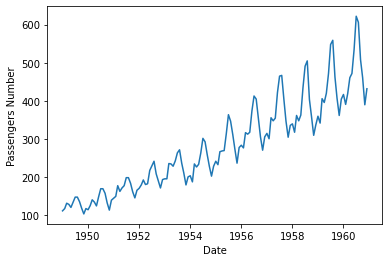

In [11]:
plt.xlabel('Date')
plt.ylabel('Passengers Number')
plt.plot(data)

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [17]:
result = adfuller(data['Passengers'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
Critical Values:
   1%, -3.4816817173418295
Critical Values:
   5%, -2.8840418343195267
Critical Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

In [19]:
dict_result = {
    'ADF': result[0],
    'p-value': result[1],
    'Number of lags': result[2],
    'Critical values': result[3]
}
df = pd.DataFrame.from_dict(dict_result, columns=['Values'], orient='index')
df

,Values
ADF,0.815369
p-value,0.991880
Number of lags,13.000000
Critical values,130.000000


Explain the results

In [ ]:
## p-value higher then 0.05  which means we have to accept the hypothesis wich means variable are no stationary


Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

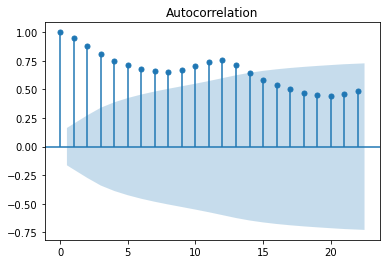

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

Calculate partial autocorrelation

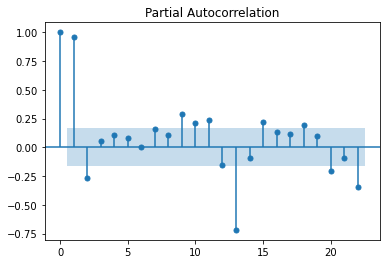

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data)
plt.show()

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


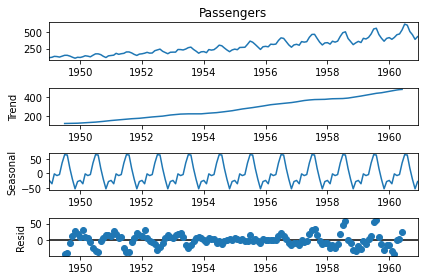

In [24]:
decompose = seasonal_decompose(data['Passengers'])
decompose = decompose.plot() 
plt.show()


Can you describe the charts?


In [31]:
## First graph : original data of the time series of passengers. 
## Second graph :  trend,  number of passengers increases in time 
## Third graph : seasonality, how data is repeated in time. 
## Fourth graph : showing the residuals, the noise that couldn't be inclouded in trend and seasonality

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [34]:
data['log'] = np.log(data['Passengers']).diff()
data.head()

,Passengers,log
Month,,
1949-01-01,112,NaN
1949-02-01,118,0.052186
1949-03-01,132,0.112117
1949-04-01,129,-0.022990
1949-05-01,121,-0.064022


In [35]:
result = adfuller(data['log'].dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.72
5% Critical Value: -2.88
p-value: 0.07


In [ ]:
## p-value is higher then 0.05 but let's say it's stationary

MA(1)

In [52]:
from statsmodels.tsa.arima_model import ARMA
model1 = ARMA(data['log'].dropna(), order=(0, 1))
result1 = model1.fit()

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

Display the output

In [53]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    log   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Wed, 19 Jan 2022   AIC                           -237.507
Time:                        16:51:59   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0097      0.011      0.887      0.375      -0.012       0.031
ma.L1.log      0.2722      0.095      2.873      0.004       0.086       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6744           +0.0000j            3.6744            0.5000
-----------------------------------------------------------------------------
"""

In [65]:
pred1=result1.predict()

MA(2)

In [54]:
model2 = ARMA(data['log'].dropna(), order=(0, 2))
result2 = model2.fit()

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

Display the output

In [55]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    log   No. Observations:                  143
Model:                     ARMA(0, 2)   Log Likelihood                 124.189
Method:                       css-mle   S.D. of innovations              0.101
Date:                Wed, 19 Jan 2022   AIC                           -240.379
Time:                        16:52:10   BIC                           -228.528
Sample:                    02-01-1949   HQIC                          -235.563
                         - 12-01-1960                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.007      1.314      0.189      -0.005       0.024
ma.L1.log      0.2019      0.120      1.688      0.091      -0.033       0.436
ma.L2.log     -0.3409      0.188     -1.814      0.070      -0.709       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4419           +0.0000j            1.4419            0.5000
MA.2            2.0342           +0.0000j            2.0342            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
pred2=result2.predict()

AR(2)

In [56]:
model3 = ARMA(data['log'].dropna(), order=(2, 0))
result3 = model3.fit()

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [57]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    log   No. Observations:                  143
Model:                     ARMA(2, 0)   Log Likelihood                 122.802
Method:                       css-mle   S.D. of innovations              0.102
Date:                Wed, 19 Jan 2022   AIC                           -237.605
Time:                        16:52:23   BIC                           -225.753
Sample:                    02-01-1949   HQIC                          -232.789
                         - 12-01-1960                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.009      1.048      0.295      -0.008       0.028
ar.L1.log      0.2359      0.083      2.855      0.004       0.074       0.398
ar.L2.log     -0.1725      0.083     -2.070      0.038      -0.336      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6838           -2.3088j            2.4079           -0.2042
AR.2            0.6838           +2.3088j            2.4079            0.2042
-----------------------------------------------------------------------------
"""

In [67]:
pred3=result3.predict()

ARMA (?,?)

In [58]:
model4 = ARMA(data['log'].dropna(), order=(2, 2))
result4 = model4.fit()

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

Display the output

In [59]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    log   No. Observations:                  143
Model:                     ARMA(2, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Wed, 19 Jan 2022   AIC                           -287.281
Time:                        16:53:10   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.log      1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.log     -0.8946      0.039    -23.127      0.000      -0.970      -0.819
ma.L1.log     -1.8270      0.036    -51.303      0.000      -1.897      -1.757
ma.L2.log      0.9245      0.036     25.568      0.000       0.854       0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9106           -0.5372j            1.0573           -0.0848
AR.2            0.9106           +0.5372j            1.0573            0.0848
MA.1            0.9881           -0.3245j            1.0400           -0.0505
MA.2            0.9881           +0.3245j            1.0400            0.0505
-----------------------------------------------------------------------------
"""

In [68]:
pred4=result4.predict()

ARIMA(?,?)

In [60]:
from statsmodels.tsa.arima_model import ARIMA
model5 = ARIMA(data['log'].dropna(), order=(2,1,2))
result5 = model5.fit()

C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\paul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

Display the output

In [61]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.log   No. Observations:                  142
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 121.227
Method:                       css-mle   S.D. of innovations              0.101
Date:                Wed, 19 Jan 2022   AIC                           -230.454
Time:                        16:53:34   BIC                           -212.720
Sample:                    03-01-1949   HQIC                          -223.248
                         - 12-01-1960                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.754e-05      0.000     -0.314      0.754      -0.001       0.000
ar.L1.D.log    -0.5792      0.122     -4.736      0.000      -0.819      -0.339
ar.L2.D.log     0.0358      0.097      0.369      0.712      -0.154       0.226
ma.L1.D.log    -0.1346      0.090     -1.487      0.137      -0.312       0.043
ma.L2.D.log    -0.8654      0.090     -9.609      0.000      -1.042      -0.689
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5734           +0.0000j            1.5734            0.5000
AR.2           17.7402           +0.0000j           17.7402            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1555           +0.0000j            1.1555            0.5000
-----------------------------------------------------------------------------
"""

In [69]:
pred5=result5.predict()

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [62]:
from statsmodels.tools.eval_measures import rmse

In [70]:
rmse_MA1 = rmse(data['log'],pred1)
rmse_MA2 = rmse(data['log'],pred2)
rmse_AR2 = rmse(data['log'],pred3)
rmse_ARMA = rmse(data['log'],pred4)
rmse_ARIMA = rmse(data['log'],pred5)

ValueError: operands could not be broadcast together with shapes (144,) (143,) 

Calculate AIC

In [76]:
print(result1.aic)
print(result2.aic)
print(result3.aic)
print(result4.aic)
print(result5.aic)

-237.50731498554302
-240.3789540202485
-237.60463569752852
-287.28080792170687
-230.4544919732516
